### Credit Card Fraud Data

This dataset contains instances of credit card fraud transactions from European customers. PCA has already been applied to the dataset, so this is engineered data from the get-go. The biggest challenge is to increase recall as there is severe class imbalance in the dataset with the fraud cases only accounting for less than 1% of the dataset.

In [11]:
# read in the csv file
import pandas as pd
df = pd.read_csv("creditcard.csv")

In [12]:
# Let's visualize the dataset to see what it looks like
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
# Check for the y column and class instances
df.Class.unique()

array([0, 1])

In [23]:
# Check to confirm class imbalance
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [14]:
# check for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

The data has no null values so we don't need to do much cleaning. Since PCA has already been applied, we don't need much feature engineering either. We will remove the time column for now and run with all 28 PCA features.

In [42]:
# train-test split
from sklearn.model_selection import train_test_split


df_y = df['Class']
df_x = df.drop(['Class','Time'],axis = 1)

X = df_x
y = df_y

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify = y)

In [44]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
# Instantiate
scaler.fit(X_train)
# Transform the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
X_train_scaled.shape

(170884, 29)

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes = (50,50,50), max_iter = 100000)

mlp.fit(X_train_scaled, y_train)

print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled, y_test))
pred_train = mlp.predict(X_train_scaled)
pred_test = mlp.predict(X_test_scaled)
recall = recall_score(y_test, pred_test)
precision = precision_score(y_test, pred_test)
f1score = f1_score(y_test, pred_test)
cmat = confusion_matrix(y_test, pred_test)
print(recall)
print(precision)
print(f1score)
print('Confusion matrix:\n', cmat)



0.9999122211558719
0.9994908841937098
0.8426395939086294
0.8601036269430051
0.8512820512820511
Confusion matrix:
 [[113699     27]
 [    31    166]]


In [49]:
# Now lets plot the ROC Curve
# Calculate Probability for ROC curve
pred_test_proba = mlp.predict_proba(X_test_scaled)[:,1]

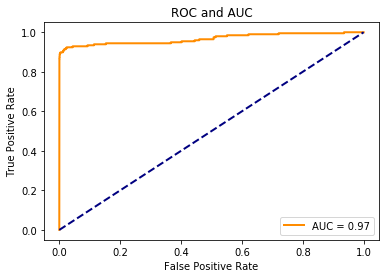

AUC score: 0.967


In [50]:
# model evaluation
from sklearn.metrics import roc_curve, auc    

fpr, tpr, _ = roc_curve(y_test, pred_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC')
plt.legend(loc="best")
plt.show()
print("AUC score: %3.3f" % roc_auc)

## Evaluation Metrics

The Neural Network model shows great results, but because of our severe class imbalance accuracy is not of primary importance. Since we are trying to detect credit card fraud, we want to accurately predict as many of the cases of that as possible thus our model recall is of primary importance. Through our working, we can see a trade-off between precision and recall but we will comprise some precision for greater recall. The Neural Network has so far given us our best model in my view with an 84% recall and 86% precision with a AUC score of 0.967

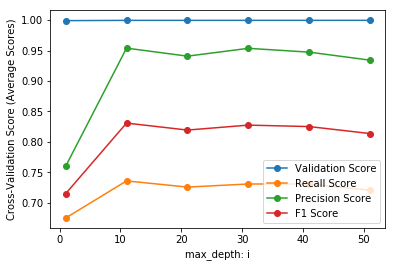

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

sample_range = np.arange(1,60,10) 
validation_score_list = []
recall_list = []
precision_list = []
f1score_list = []

for i in sample_range:
    my_random_forest = RandomForestClassifier(n_estimators=i)
    validation_score = np.mean(cross_val_score(my_random_forest, X_train_scaled, y_train, cv = 5))
    validation_score_list.append(validation_score)
    
    # Fit
    my_random_forest.fit(X_train_scaled, y_train)

    # predict
    pred_train = my_random_forest.predict(X_train_scaled)
    pred_test = my_random_forest.predict(X_test_scaled)
    
    recall_list.append(recall_score(y_test, pred_test))
    precision_list.append(precision_score(y_test, pred_test))
    f1score_list.append(f1_score(y_test, pred_test))


    
%matplotlib inline
plt.plot(sample_range, validation_score_list,label="Validation Score",marker='o')
plt.plot(sample_range, recall_list,label="Recall Score",marker='o')
plt.plot(sample_range, precision_list,label="Precision Score",marker='o')
plt.plot(sample_range, f1score_list,label="F1 Score",marker='o')
plt.legend()
plt.xlabel('max_depth: i')
plt.ylabel('Cross-Validation Score (Average Scores)')
plt.show();


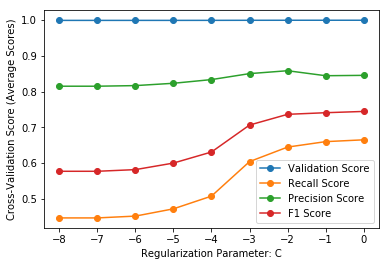

In [47]:
# Lets plot out different parameters with 5-fold cross validation
validation_score_list = []
sample_range = [.00000001,.0000001,.000001,.00001,.0001,0.001,0.01,0.1,1]
recall_list = []
precision_list = []
f1score_list = []

for c in sample_range:
    # Instantiate
    LR_model = LogisticRegression(C=c)
    validation_score = np.mean(cross_val_score(LR_model, X_train_scaled, y_train, cv = 5))
    validation_score_list.append(validation_score)
    
    # Fit
    LR_model.fit(X_train_scaled, y_train)

    # predict
    pred_train = LR_model.predict(X_train_scaled)
    pred_test = LR_model.predict(X_test_scaled)
    
    recall_list.append(recall_score(y_test, pred_test))
    precision_list.append(precision_score(y_test, pred_test))
    f1score_list.append(f1_score(y_test, pred_test))


%matplotlib inline
plt.plot(np.log10(sample_range), validation_score_list,label="Validation Score",marker='o')
plt.plot(np.log10(sample_range), recall_list,label="Recall Score",marker='o')
plt.plot(np.log10(sample_range), precision_list,label="Precision Score",marker='o')
plt.plot(np.log10(sample_range), f1score_list,label="F1 Score",marker='o')
plt.legend()
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross-Validation Score (Average Scores)')
plt.show();


In [33]:
my_random_forest = RandomForestClassifier(n_estimators=12)
my_random_forest.fit(X_train_scaled, y_train)

# predict
pred_train = my_random_forest.predict(X_train_scaled)
pred_test = my_random_forest.predict(X_test_scaled)

print(my_random_forest.score(X_train_scaled, y_train))
print(my_random_forest.score(X_test_scaled, y_test))

recall = recall_score(y_test, pred_test)
precision = precision_score(y_test, pred_test)
f1score = f1_score(y_test, pred_test)
cmat = confusion_matrix(y_test, pred_test)
print(recall)
print(precision)
print(f1score)
print('Confusion matrix:\n', cmat)

    

0.9999414807705812
0.9994294391826058
0.7157360406091371
0.94
0.8126801152737751
Confusion matrix:
 [[113717      9]
 [    56    141]]


In [38]:
my_random_forest = RandomForestClassifier(n_estimators=12, class_weight = {0:1,1:3})
my_random_forest.fit(X_train_scaled, y_train)

# predict
pred_train = my_random_forest.predict(X_train_scaled)
pred_test = my_random_forest.predict(X_test_scaled)

print(my_random_forest.score(X_train_scaled, y_train))
print(my_random_forest.score(X_test_scaled, y_test))

recall = recall_score(y_test, pred_test)
precision = precision_score(y_test, pred_test)
f1score = f1_score(y_test, pred_test)
cmat = confusion_matrix(y_test, pred_test)
print(recall)
print(precision)
print(f1score)
print('Confusion matrix:\n', cmat)


0.99990636923293
0.999438217041335
0.700507614213198
0.965034965034965
0.8117647058823529
Confusion matrix:
 [[113721      5]
 [    59    138]]
